   visit_id  kdkc  dati2 typeppk jkpst  umur  jnspelsep  los cmg  \
0         1  1107    150      SB     P    64          2    0   F   
1         2  1303    200      C      L    45          1    9   E   
2         3  1114    172      B      P    34          2    0   Q   
3         4   601     90      SC     L    34          2    0   Q   
4         5  1006    130      B      L    27          2    0   F   

   severitylevel  ... proc63_67  proc68_70  proc71_73  proc74_75  proc76_77  \
0              0  ...         0          0          0          0          0   
1              3  ...         0          0          0          0          0   
2              0  ...         0          0          0          0          0   
3              0  ...         0          0          0          0          0   
4              0  ...         0          0          0          0          0   

   proc78_79  proc80_99  proce00_e99  procv00_v89  label  
0          0          0            0            0      1 

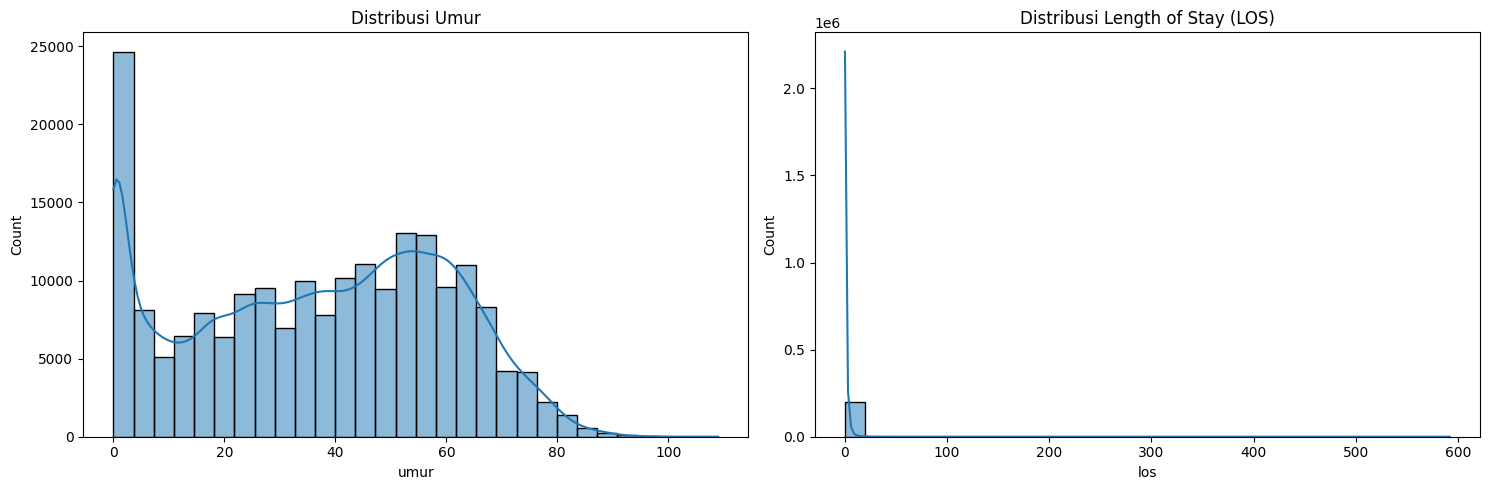

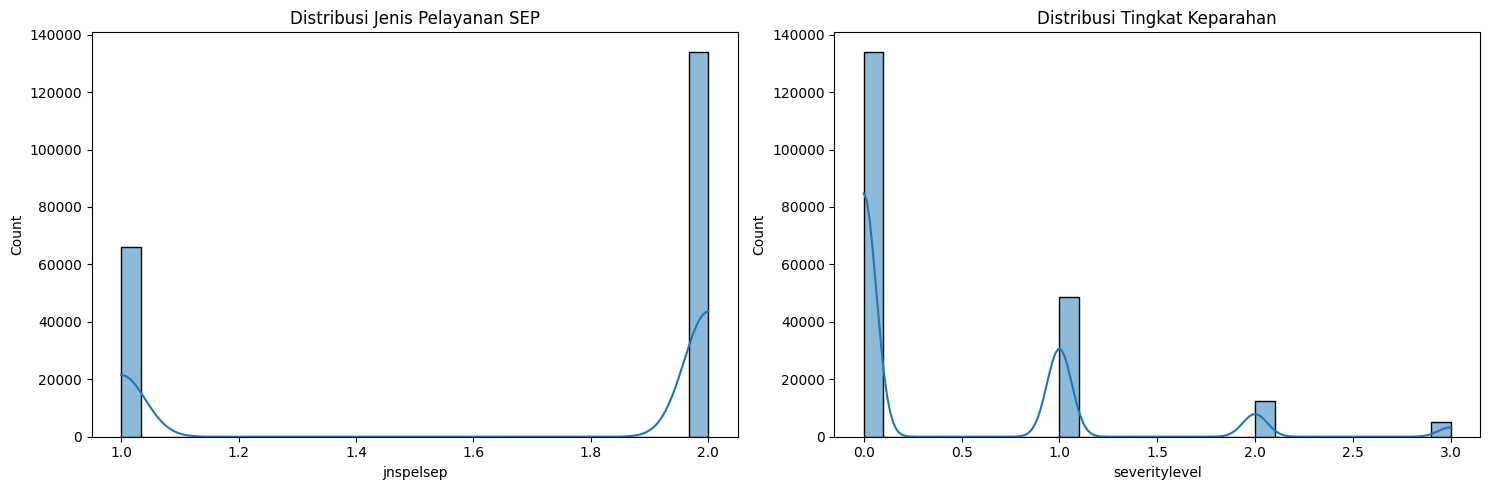

visit_id : 200217
kdkc : 126
dati2 : 486
typeppk : 25
jkpst : 2
umur : 105
jnspelsep : 2
los : 142
cmg : 23
severitylevel : 4
diagprimer : 21
dx2_a00_b99 : 5
dx2_c00_d48 : 4
dx2_d50_d89 : 4
dx2_e00_e90 : 7
dx2_f00_f99 : 3
dx2_g00_g99 : 5
dx2_h00_h59 : 5
dx2_h60_h95 : 4
dx2_i00_i99 : 7
dx2_j00_j99 : 5
dx2_koo_k93 : 1
dx2_l00_l99 : 4
dx2_m00_m99 : 4
dx2_n00_n99 : 5
dx2_o00_o99 : 7
dx2_p00_p96 : 14
dx2_q00_q99 : 7
dx2_r00_r99 : 5
dx2_s00_t98 : 8
dx2_u00_u99 : 1
dx2_v01_y98 : 3
dx2_z00_z99 : 6
proc00_13 : 5
proc14_23 : 6
proc24_27 : 4
proc28_28 : 3
proc29_31 : 3
proc_32_38 : 6
proc39_45 : 5
proc46_51 : 4
proc52_57 : 6
proc58_62 : 4
proc63_67 : 4
proc68_70 : 3
proc71_73 : 5
proc74_75 : 5
proc76_77 : 4
proc78_79 : 7
proc80_99 : 22
proce00_e99 : 2
procv00_v89 : 1
label : 2


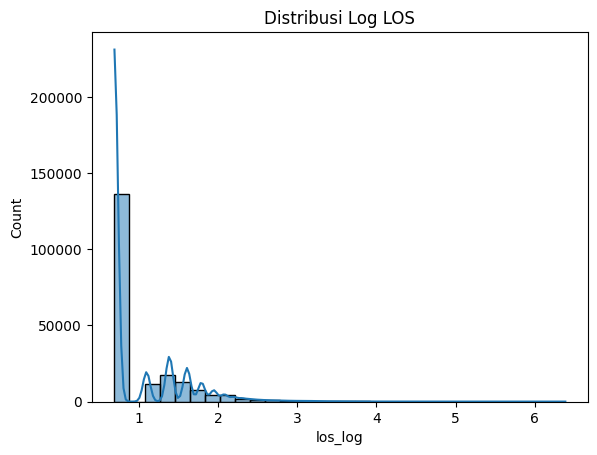

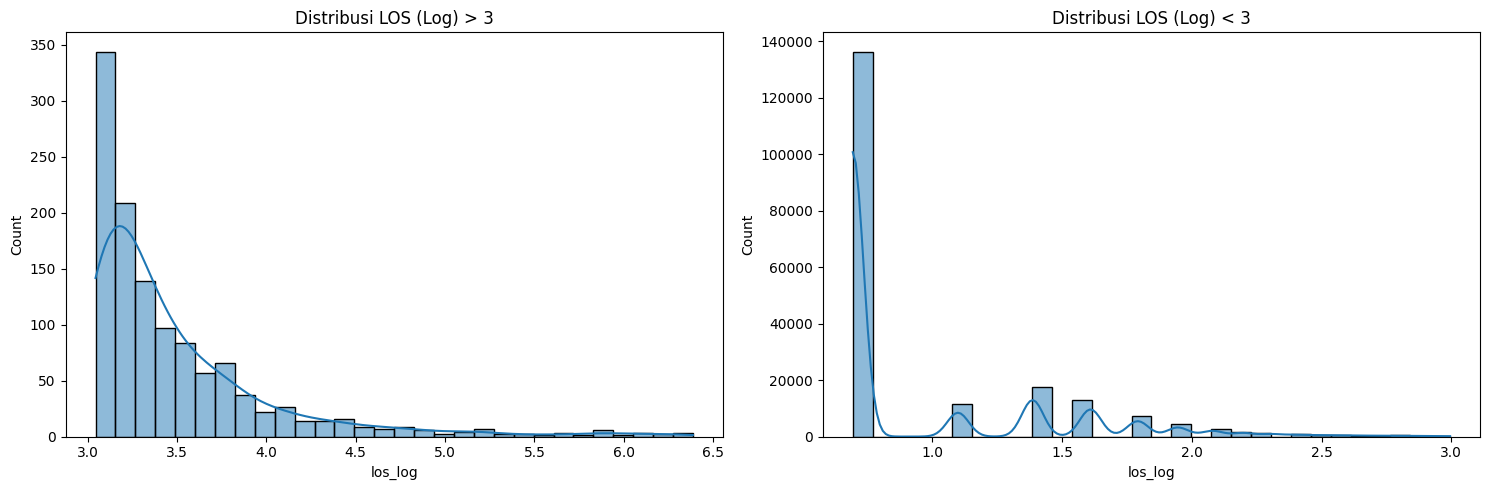

Ukuran dataset setelah menghapus LOS > 40: (199980, 50)
label
0    59
1    55
Name: count, dtype: int64


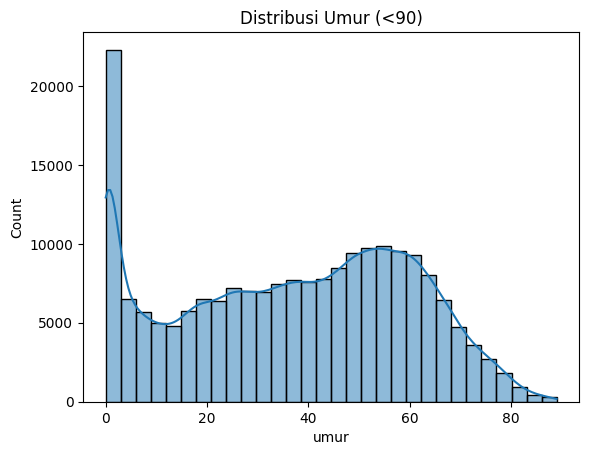

label
1    1795
0     521
Name: count, dtype: int64
Ukuran dataset setelah penghapusan: (199459, 50)


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

tqdm.pandas()

# Set random seed
RANDOM_SEED = 42

# Load dataset
df = pd.read_csv("fraud_detection_train.csv")

# Menampilkan 5 baris pertama
print(df.head())

# Cek informasi dataset
print(df.info())

# Cek jumlah nilai unik dalam setiap kolom
print(df.nunique())

# Konversi semua kolom bertipe object (string) menjadi kategori numerik
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype("category").cat.codes

# Menampilkan korelasi dengan label
correlation = df.corr(numeric_only=True)["label"]
print(correlation)

# Membuat subplot untuk visualisasi distribusi umur dan LOS (length of stay)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Menggunakan histplot sebagai pengganti distplot
sns.histplot(df.umur, ax=ax1, kde=True, bins=30)
ax1.set_title("Distribusi Umur")

sns.histplot(df.los, ax=ax2, kde=True, bins=30)
ax2.set_title("Distribusi Length of Stay (LOS)")

# Menampilkan plot
plt.tight_layout()
plt.show()

# Membuat subplot untuk visualisasi jnspelsep dan severitylevel
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Menggunakan histplot sebagai pengganti distplot
sns.histplot(df.jnspelsep, ax=ax1, kde=True, bins=30)
ax1.set_title("Distribusi Jenis Pelayanan SEP")

sns.histplot(df.severitylevel, ax=ax2, kde=True, bins=30)
ax2.set_title("Distribusi Tingkat Keparahan")

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menentukan kolom yang penting berdasarkan jumlah nilai unik
imp = []
for col in df.columns.tolist():
    nunique = df[col].nunique()
    print(f"{col} : {nunique}")
    if nunique > 1 and nunique != df.shape[0]:
        imp.append(col)

# Membuat salinan dataset dengan hanya kolom yang relevan
df2 = df[imp].copy()
df2["los_log"] = np.log(df2.los + 2)  # Transformasi log untuk los

# Plot distribusi los_log
sns.histplot(df2.los_log, kde=True, bins=30)
plt.title("Distribusi Log LOS")
plt.show()

# Membuat subplot untuk distribusi los_log berdasarkan kondisi tertentu
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df2[df2.los_log > 3].los_log, ax=ax1, kde=True, bins=30)
ax1.set_title("Distribusi LOS (Log) > 3")

sns.histplot(df2[df2.los_log < 3].los_log, ax=ax2, kde=True, bins=30)
ax2.set_title("Distribusi LOS (Log) < 3")

plt.tight_layout()
plt.show()

# Menghapus data dengan nilai LOS > 40
df2.drop(df2[(df2.los > 40)].index, inplace=True)
print(f"Ukuran dataset setelah menghapus LOS > 40: {df2.shape}")

# Melihat distribusi label untuk pasien dengan umur > 90
print(df2[df2.umur > 90].label.value_counts())

# Plot distribusi umur untuk pasien dengan umur < 90
sns.histplot(df2[df2.umur < 90].umur, kde=True, bins=30)
plt.title("Distribusi Umur (<90)")
plt.show()

# Melihat distribusi label untuk kondisi LOS == 0 dan jnspelsep == 1
print(df2[(df2.los == 0) & (df2.jnspelsep == 1)].label.value_counts())

# Menghapus data dengan kondisi LOS == 0, label == 0, dan jnspelsep == 1
df2.drop(df2[(df2.los == 0) & (df2.label == 0) & (df2.jnspelsep == 1)].index, inplace=True)
print(f"Ukuran dataset setelah penghapusan: {df2.shape}")


# Feature Engineering

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.metrics import classification_report

tqdm.pandas()

# Load dataset
df = pd.read_csv("fraud_detection_train.csv")

# Konversi semua kolom bertipe object (string) menjadi kategori numerik
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype("category").cat.codes

# Pilih kolom yang berisi "proc" atau "dx2"
proc_cols = [col for col in df.columns if "proc" in col]
dx2_cols = [col for col in df.columns if "dx2" in col]

# Fungsi untuk menghitung jumlah dx2
def count_dx2(row):
    return sum(row[col] > 0 for col in dx2_cols)

# Fungsi untuk menghitung jumlah proc
def count_proc(row):
    return sum(row[col] > 0 for col in proc_cols)

# Menambahkan kolom count_dx2 dan count_proc
df["count_dx2"] = df.apply(count_dx2, axis=1)
df["count_proc"] = df.apply(count_proc, axis=1)

# Fungsi untuk mengelompokkan umur
def encode_umur(x):
    if x <= 5:
        return 1
    elif x <= 11:
        return 2
    elif x <= 16:
        return 3
    elif x <= 25:
        return 4
    elif x <= 35:
        return 5
    elif x <= 45:
        return 6
    elif x <= 55:
        return 7
    elif x <= 65:
        return 8
    else:
        return 9

df["encode_umur"] = df["umur"].apply(encode_umur)

# Menggabungkan kolom dati2 dan kdkc
df["dati2_kdkc"] = df["dati2"].astype(str) + "_" + df["kdkc"].astype(str)

# Fungsi untuk menandai bayi
df["is_baby"] = (df["umur"] == 0).astype(int)

# Menyimpan data yang telah diproses
df2 = df.copy()

# Melihat distribusi label pada dati2_kdkc
print(df2[df2.label == 1]["dati2_kdkc"].value_counts())

# Menghitung jumlah prosedur dan diagnosis sekunder
df2["count_proc"] = df2[proc_cols].sum(axis=1)
df2["count_dx2"] = df2[dx2_cols].sum(axis=1)

# Kolom yang akan dihapus
drop_cols = ["los", "jnspelsep", "jkpst", "kdkc"]
drop_cols = [col for col in drop_cols if col in df2.columns]  # Cek apakah kolom ada sebelum menghapus

# Tipe data yang perlu dikonversi
astype_dict = {"dati2": "object", "severitylevel": "object"}

# Menentukan variabel independen (X) dan dependen (y)
X = df2.drop(["label"] + drop_cols + proc_cols + dx2_cols, axis=1)
y = df2["label"].copy()

X = X.astype(astype_dict)

# Split data menjadi training dan validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9, stratify=y, random_state=42)

# Menambah fitur baru: perbedaan jumlah prosedur dan diagnosis sekunder
X["proc_dx2"] = X["count_proc"] - X["count_dx2"]
X = X.drop(["count_proc", "count_dx2"], axis=1)

# Cek informasi dataset setelah preprocessing
print(X.info())


dati2_kdkc
221_1018    2442
217_1301    2185
90_601      2063
173_1101    1893
116_905     1806
            ... 
458_105        3
361_2401       3
452_2404       2
419_2503       2
524_1901       2
Name: count, Length: 485, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200217 entries, 0 to 200216
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   visit_id       200217 non-null  int64 
 1   dati2          200217 non-null  object
 2   typeppk        200217 non-null  int8  
 3   umur           200217 non-null  int64 
 4   cmg            200217 non-null  int8  
 5   severitylevel  200217 non-null  object
 6   diagprimer     200217 non-null  int8  
 7   encode_umur    200217 non-null  int64 
 8   dati2_kdkc     200217 non-null  object
 9   is_baby        200217 non-null  int32 
 10  proc_dx2       200217 non-null  int64 
dtypes: int32(1), int64(4), int8(3), object(3)
memory usage: 12.0+ MB
None


# Model Predict

In [3]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

# Pastikan dataset tersedia
try:
    df2.head()
except NameError:
    print("Error: Dataset `df2` belum didefinisikan. Pastikan Anda sudah menjalankan preprocessing.")
    raise

# Pilih fitur dan target
drop_cols = ["los", "jnspelsep", "jkpst", "kdkc"]  # Kolom yang akan dibuang karena tidak memiliki korelasi dengan fraud
drop_cols = [col for col in drop_cols if col in df2.columns]  # Hindari error jika kolom tidak ada

X = df2.drop(["label"] + drop_cols, axis=1)
y = df2["label"].copy()

# Konversi kategori ke numerik jika diperlukan
X = X.astype({"dati2": "object", "severitylevel": "object"})

# Bagi dataset menjadi training dan validation
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

# Pastikan X sudah didefinisikan
print(f"✅ X sudah didefinisikan dengan {X.shape[0]} baris dan {X.shape[1]} fitur.")


✅ X sudah didefinisikan dengan 200217 baris dan 53 fitur.


{'fit_time': array([1583.32263923, 1568.63343191, 1572.93289971, 1607.5293932 ,
       1582.90886307, 1590.35259199, 1530.78723121, 1576.45115304,
        522.16226935,  490.29472947]), 'score_time': array([0.96548319, 1.11889052, 1.50241184, 0.94167757, 1.04017711,
       0.94990993, 1.33092713, 1.39789128, 0.617172  , 0.40551281]), 'test_precision': array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99990009, 1.        , 1.        , 1.        ]), 'test_recall': array([0.99845394, 0.9989028 , 0.9989028 , 0.99795521, 0.99850382,
       0.99850382, 0.99830432, 0.99825445, 0.99905242, 0.99850382]), 'test_f1': array([0.99922637, 0.9994511 , 0.9994511 , 0.99897656, 0.99925135,
       0.99925135, 0.99910157, 0.99912646, 0.99952598, 0.99925135]), 'test_accuracy': array([0.99922585, 0.9994506 , 0.99945059, 0.9989761 , 0.99925081,
       0.99925082, 0.99910099, 0.99912594, 0.99952551, 0.99925081])}
avg_precision 0.9999900094909837
avg_recall 0.9985337389656

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 472ms	remaining: 7m 51s
100:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 26.5s	remaining: 3m 56s
200:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 51.2s	remaining: 3m 23s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 1
bestIteration = 0

Shrink model to first 1 iterations.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9997
           1       1.00      1.00      1.00     10025

    accuracy                           1.00     20022
   macro avg       1.00      1.00      1.00     20022
weighted avg       1.00      1.00      1.00     20022

visit_id 99.76878467330009
dati2 0.0
typeppk 0.0
umur 0.11559490208398043
cmg 0.0
severitylevel 0.0
diagprimer 0.0
dx2_a00_b99 0.0
dx2_c00_d48 0.0
dx2_d50_d89 0.0
dx2_e00_e90 0.054503178331582275
dx2_f00_f99 0.0
dx2_g00_g99 0.0
dx2_h00_h59 0.0
dx2_h60_h95 0.0
dx2_i00_i99 0.0
dx2_j00_

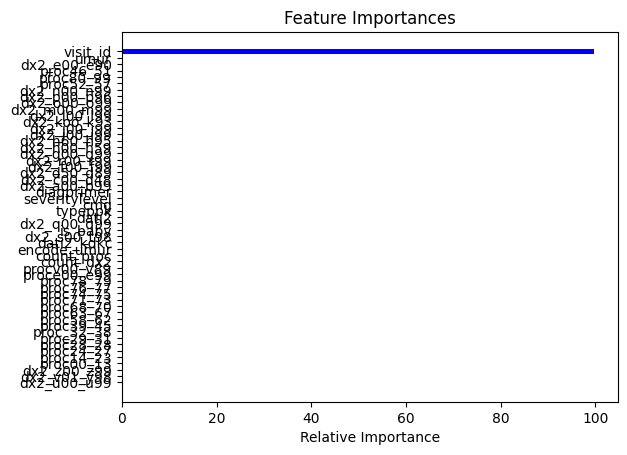

In [4]:

#--
from catboost import CatBoostClassifier

cat_features = [index for index, column in enumerate(X.columns) if X[column].dtype == "object"]
params = {
    "loss_function": "CrossEntropy",
    "eval_metric": "Precision",
    "random_seed": 42,
    "task_type": "CPU",
    "cat_features": cat_features,
    "early_stopping_rounds": 200,
    "iterations": 1000,
    "verbose": 100,
    "max_depth": 10,
}

cat = CatBoostClassifier(**params)
scoring = ['precision', 'recall', 'f1', 'accuracy']
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
score = cross_validate(cat, X, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False)

print(score)

#--
avg_precision = score["test_precision"].mean()
avg_recall = score["test_recall"].mean()
avg_f1 = score["test_f1"].mean()
avg_accuracy = score["test_accuracy"].mean()
print("avg_precision", score["test_precision"].mean())
print("avg_recall", score["test_recall"].mean())
print("avg_f1", score["test_f1"].mean())
print("final_score", 0.4*avg_precision + 0.3*avg_recall + 0.3*avg_accuracy)

#--
import collections
from sklearn.model_selection import train_test_split

TRAIN_SIZE = 0.8
VAL_SIZE = 0.10
TEST_SIZE = 0.10

def train_val_test_split(X, y, train_size):
    """Split dataset into data splits."""
    X_train, X_, y_train, y_ = train_test_split(X, y, train_size=TRAIN_SIZE, stratify=y, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.8, stratify=y_, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

#--
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X=X, y=y, train_size=TRAIN_SIZE)
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

#--
from catboost import CatBoostClassifier

cat_features = [index for index, column in enumerate(X_train.columns) if X_train[column].dtype == "object"]
params = {
    "loss_function": "CrossEntropy",
    "eval_metric": "Precision",
    "random_seed": 42,
    "task_type": "CPU",
    "cat_features": cat_features,
    "early_stopping_rounds": 200,
    "iterations": 1000,
    "verbose": 100,
    "max_depth": 8,
}

cat = CatBoostClassifier(**params)

#--
cat.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True, plot=True)

#
y_pred = cat.predict(data=X_test)
print(classification_report(y_test, y_pred))

#
for i, x in enumerate(list(X_train.columns)):
    print(x, cat.get_feature_importance()[i])

#
#@title Feature Importances
import matplotlib.pyplot as plt
features = list(X_train.columns)
importances = cat.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


EDA
Quick Peak

Precision: 0.9190843433756521
Recall: 0.8405267526376559
F1 Score: 0.878028647013935
Accuracy: 0.8830868612829171


C:\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.87     19993
           1       0.90      0.84      0.87     20051

    accuracy                           0.87     40044
   macro avg       0.87      0.87      0.87     40044
weighted avg       0.87      0.87      0.87     40044



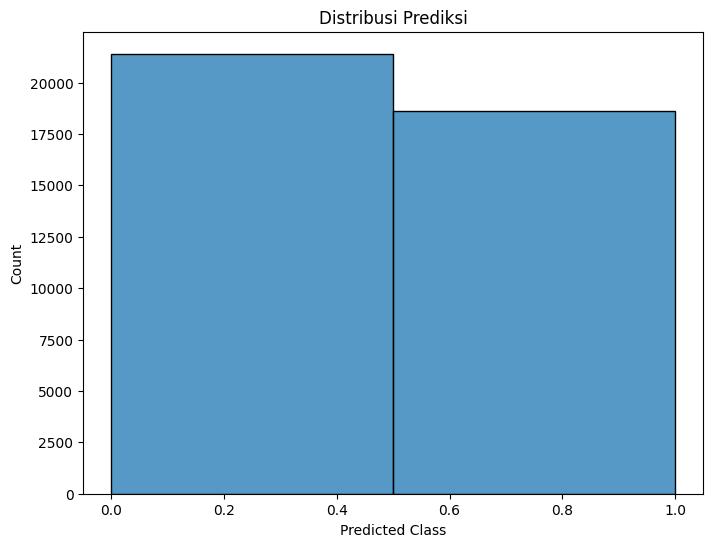

In [16]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load Dataset
df = pd.read_csv("fraud_detection_train.csv")

# Konversi fitur kategorikal menjadi kode numerik
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype("category").cat.codes

# Tentukan fitur yang akan digunakan sebagai X dan target sebagai y , "jkpst", "diagprimer"
drop_cols = ["los", "jnspelsep", "cmg"]
drop_cols = [col for col in drop_cols if col in df.columns]  

X = df.drop(drop_cols + ["label"], axis=1)
y = df["label"]

# Bagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

# Inisialisasi model Logistic Regression
log_reg = LogisticRegression(max_iter=100)

# Cross-validation dengan Repeated Stratified K-Fold
scoring = ['precision', 'recall', 'f1', 'accuracy']
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=42)

score = cross_validate(log_reg, X, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=False)

# Menampilkan hasil evaluasi
print("Precision:", score["test_precision"].mean())
print("Recall:", score["test_recall"].mean())
print("F1 Score:", score["test_f1"].mean())
print("Accuracy:", score["test_accuracy"].mean())

# Melatih model
log_reg.fit(X_train, y_train)

# Melakukan prediksi pada test set
y_pred = log_reg.predict(X_test)

# Menampilkan hasil evaluasi model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualisasi distribusi prediksi
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, bins=2, kde=False)
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.title("Distribusi Prediksi")
plt.show()



Distribusi Kelas:
 label
1    0.500732
0    0.499268
Name: proportion, dtype: float64


C:\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                     │ (None, 64)                  │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,401 (25.00 KB)

 Trainable params: 6,177 (24.13 KB)

 Non-trainable params: 224 (896.00 B)

Epoch 1/50
5006/5006 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8623 - loss: 0.6636 - val_accuracy: 0.9861 - val_loss: 0.0960
Epoch 2/50
5006/5006 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9646 - loss: 0.1395 - val_accuracy: 0.9872 - val_loss: 0.0812
Epoch 3/50
5006/5006 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9713 - loss: 0.1202 - val_accuracy: 0.9858 - val_loss: 0.0808
Epoch 4/50
5006/5006 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9743 - loss: 0.1092 - val_accuracy: 0.9884 - val_loss: 0.0707
Epoch 5/50
5006/5006 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9749 - loss: 0.1040 - val_accuracy: 0.9864 - val_loss: 0.0698
Epoch 6/50
5006/5006 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9746 - loss: 0.1023 - val_accuracy: 0.9892 - val_loss: 0.0702
Epoch 7/50
5006/5006 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9762 - loss: 0.0993 - val_accuracy: 0.9901 - val_loss: 0.0630
Epoch 8/50
5006/5006 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9753 - loss: 0

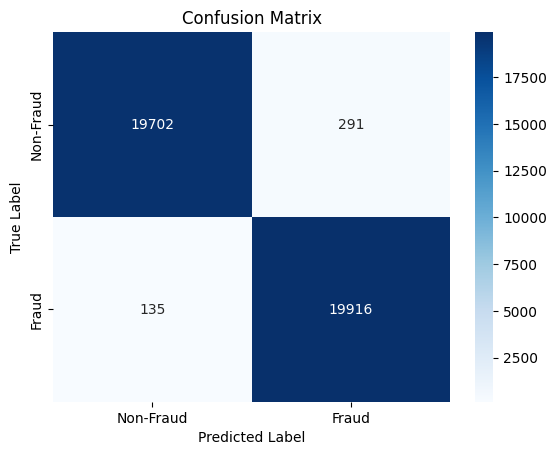

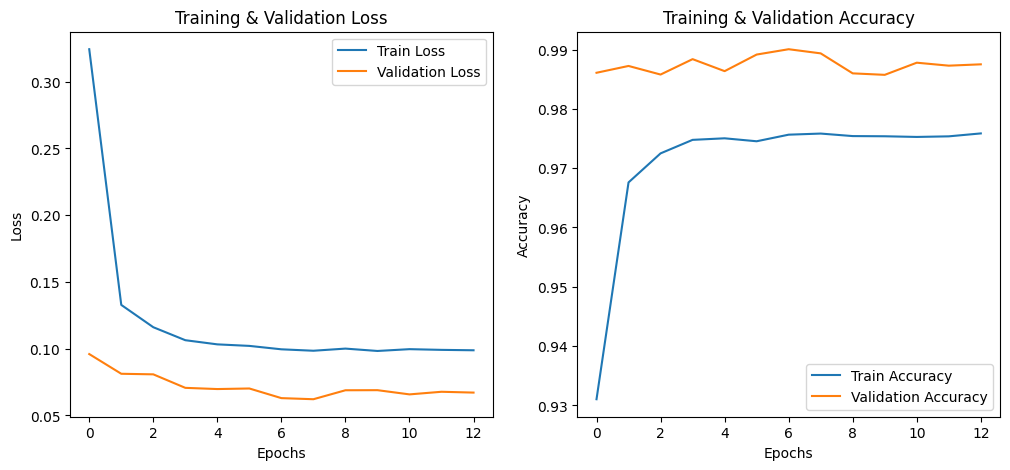

In [13]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler

# Load Dataset
df = pd.read_csv("fraud_detection_train.csv")

# Konversi fitur kategorikal menjadi kode numerik
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype("category").cat.codes

# Tentukan fitur yang akan digunakan sebagai X dan target sebagai y
drop_cols = ["los", "jnspelsep", "cmg"]  # Kolom yang tidak digunakan
drop_cols = [col for col in drop_cols if col in df.columns]

X = df.drop(drop_cols + ["label"], axis=1)  # Fitur independen
y = df["label"]  # Target label (fraud atau tidak)

# Cek distribusi kelas
print("\nDistribusi Kelas:\n", y.value_counts(normalize=True))

# Konversi y ke format integer
y = np.array(y, dtype=int)

# Menghitung class weight untuk menangani data imbalance
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)
class_weight_dict = {int(cls): weight for cls, weight in zip(np.unique(y), class_weights)}

# Normalisasi data agar ANN dapat bekerja lebih baik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi dataset menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, stratify=y, random_state=32)

# Membangun Model ANN dengan teknik anti-overfitting
model = keras.Sequential([
    Dense(64, activation="relu", kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(32, activation="relu", kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(16, activation="relu", kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(8, activation="relu", kernel_regularizer=l2(0.01)),

    Dense(1, activation="sigmoid")  # Output layer (sigmoid untuk klasifikasi biner)
])

# Compile model ANN dengan class weight
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),  
              loss="binary_crossentropy", 
              metrics=["accuracy"])

# Menampilkan arsitektur model
model.summary()

# Early Stopping untuk menghindari overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Training model ANN dengan class weight
history = model.fit(X_train, y_train, 
                    epochs=50, batch_size=32, 
                    validation_data=(X_test, y_test), 
                    class_weight=class_weight_dict,
                    callbacks=[early_stopping])

# Evaluasi model pada test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Konversi probabilitas ke kelas 0/1

# Menampilkan hasil evaluasi model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Menampilkan Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Plot Loss dan Akurasi selama Training
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()

plt.show()


SVM